# PDF and CDF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

In [3]:
x = np.linspace(-6, 6, 1000)

In [4]:
fx = norm.pdf(x, loc=0, scale=1)

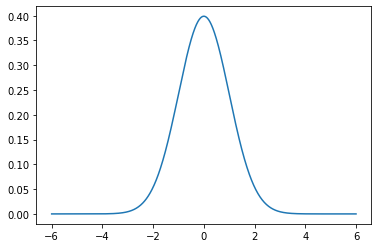

In [5]:
plt.plot(x, fx);

In [6]:
FX = norm.cdf(x, loc=0, scale=1)

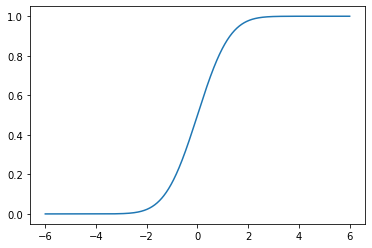

In [7]:
plt.plot(x, FX);

In [8]:
logfx = norm.logpdf(x, loc=0, scale=1)

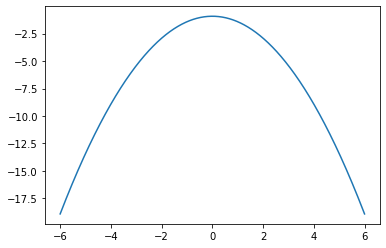

In [9]:
plt.plot(x, logfx);